In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

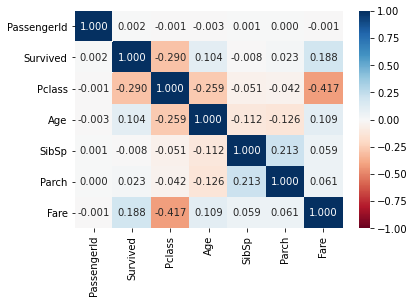

In [22]:
corr = train_data.corr()
fig = sns.heatmap(corr, cbar=True, square=False, fmt='.3f', annot=True, cmap="RdBu", vmax=1, vmin=-1).get_figure()
fig.savefig('heatmap.png')

In [24]:
numerical_columns = ['Age', 'Fare'];

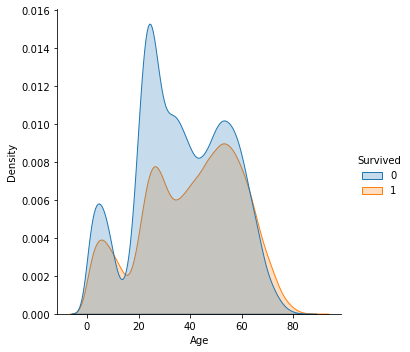

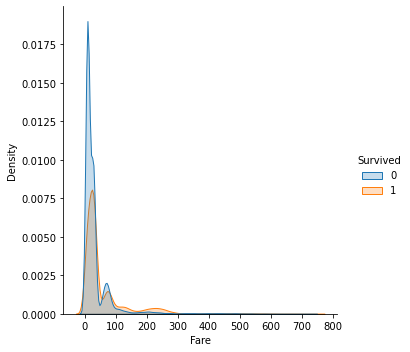

In [29]:
for column, i in zip(numerical_columns, range(len(numerical_columns))):
    fig = sns.displot(train_data, x=column, hue='Survived', fill=True, kind='kde')
    plt.savefig(fname = 'numerical' + str(i) + '.png',fig=fig)
    plt.show()

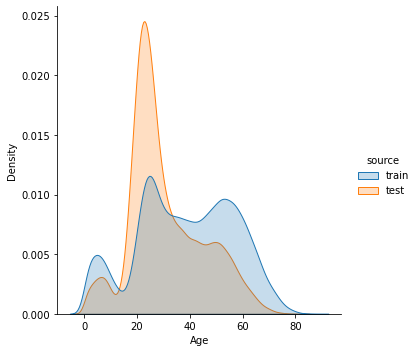

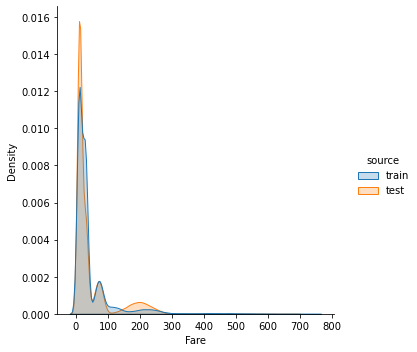

In [30]:
for column, i in zip(numerical_columns, range(len(numerical_columns))):
    temp_train = pd.DataFrame(train_data[column])
    temp_train['source'] = 'train'

    temp_test = pd.DataFrame(test_data[column])
    temp_test['source'] = 'test'
    temp_combine = pd.concat([temp_train, temp_test], axis=0)

    fig = sns.displot(temp_combine, x=column, hue='source', fill=True, kind='kde')
    plt.savefig(fname = 'numericalTrainTest' + str(i) + '.png',fig=fig)
    plt.show()

In [32]:
categorical_columns = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'];

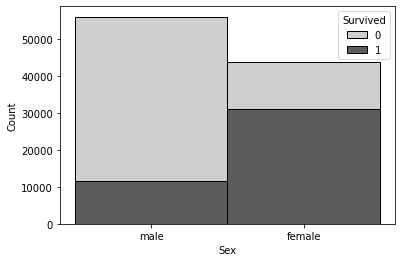

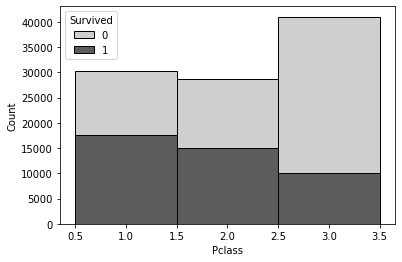

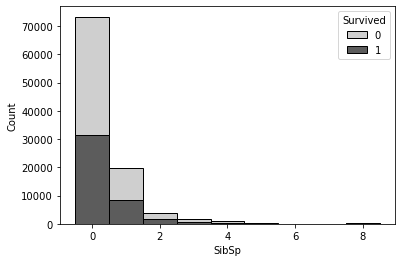

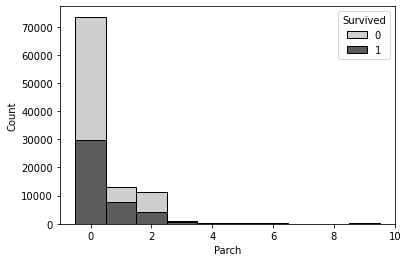

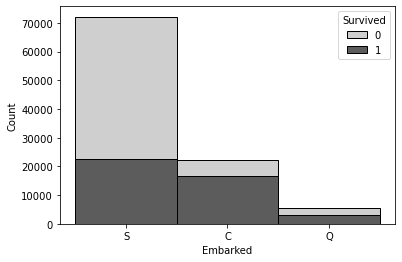

In [33]:
for column, i in zip(categorical_columns, range(len(categorical_columns))):
    with sns.dark_palette(color='#bfbfbf', n_colors=2, reverse=True):
        fig = sns.histplot(x=column, hue='Survived', data=train_data[[column, 'Survived']].dropna(), multiple="stack", discrete=True)
        plt.savefig(fname = 'categorical' + str(i) + '.png',fig=fig)
        plt.show()


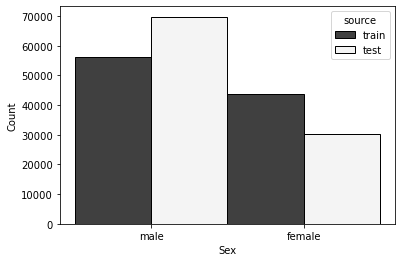

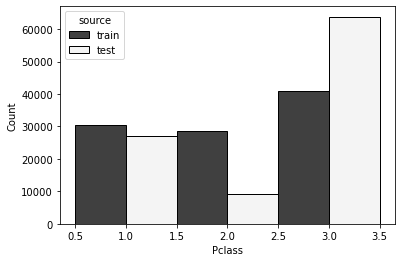

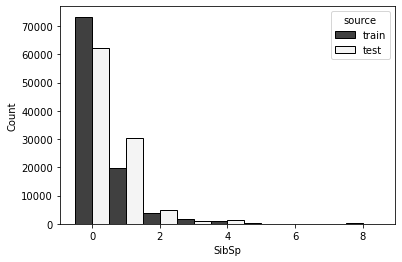

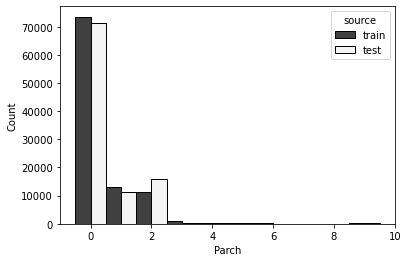

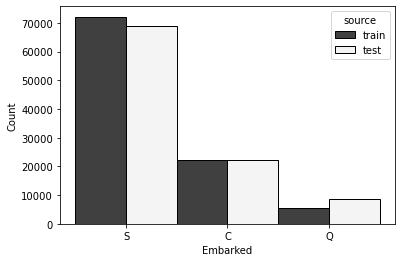

In [9]:
for column in categorical_columns:
    temp_train = pd.DataFrame(train_data[column])
    temp_train['source'] = 'train'

    temp_test = pd.DataFrame(test_data[column])
    temp_test['source'] = 'test'
    temp_combine = pd.concat([temp_train, temp_test], axis=0)
    with sns.light_palette(color='k', reverse=True, n_colors=2):
        sns.histplot(temp_combine.drop('source', errors='ignore').dropna(), x=column, hue='source', multiple='dodge', discrete=True)
        plt.show()